In [1]:
import numpy as np
from numpy import *
import scipy as sc
import scipy.optimize as opt
import random
import matplotlib.pyplot as plt
import scipy.stats as stats
from numpy.random import randint
import math
from scipy.optimize import minimize as mini
from scipy.optimize import least_squares as ls
from scipy.optimize import leastsq
import gc
from multiprocessing import Process
#import colorednoise as cn
from numpy import concatenate, real, std, abs, min
from numpy.fft import ifft, fftfreq, fft, rfft, irfft, hfft, ihfft
from numpy.random import normal
import time
import scipy.fftpack as scf
from matplotlib import mlab



In [2]:
def powerlaw_psd_gaussian(exponent, samples, fmin=0):
    """Gaussian (1/f)**beta noise.
    """

    # frequencies (we asume a sample rate of one)
    f = fftfreq(samples)

    # scaling factor for all frequencies
    ## though the fft for real signals is symmetric,
    ## the array with the results is not - take neg. half!
    s_scale = abs(concatenate([f[f<0], [f[-1]]]))
    ## low frequency cutoff?!?
    if fmin:
        ix = sum(s_scale>fmin)
        if ix < len(f):
            s_scale[ix:] = s_scale[ix]
    s_scale = s_scale**(-exponent/2.)

    # scale random power + phase
    sr = s_scale * normal(size=len(s_scale))
    si = s_scale * normal(size=len(s_scale))
    if not (samples % 2): si[0] = si[0].real

    s = sr + 1J * si
    # this is complicated... because for odd sample numbers,ss
    ## there is one less positive freq than for even sample numbers
    s = concatenate([s[1-(samples % 2):][::-1], s[:-1].conj()])

    # time series
    y = ifft(s).real
    #y*= 10**np.random.normal(-13.7,1.5,1)[0]
    y += abs(min(y))

    #y = rfft(y)
    #y = irfft(y)

    #y1 = y / std(y)
    #print y1

    #y1 = y1

    #y2 = ifft(y1)

    ret = y

    #print 'HEY', ret
    #print 'HEY HO'

    return ret

In [10]:
x = np.arange(1,500,1)
x_rfft = np.arange(1,499,1)
y = powerlaw_psd_gaussian(2.5, 100000, fmin=0)
z = powerlaw_psd_gaussian(5.0, 80, fmin=0)
y2 = np.copy(y)
y2[0:80] = z

print np.shape(y), np.shape(y2)

y_fft = rfft(irfft(rfft(irfft(rfft(irfft(rfft(irfft(rfft(y)))))))))
z_fft = rfft(z)
y2_fft = rfft(y2) #np.copy(y_fft) #rfft(y2)
#y2_fft[0:41] = z_fft
print np.shape(z_fft), np.shape(z)
print np.shape(y_fft), np.shape(irfft(y_fft))
print np.shape(irfft(rfft(irfft(rfft(irfft(rfft(y)))))))

(100000,) (100000,)
(41,) (80,)
(50001,) (100000,)
(100000,)


In [11]:
#change = rfft(colour(np.random.normal(2.8,0.25,1)[0],40)) #len(cont[:,1])))
weight = 0.5 #random.random()*0.005 #0.05
cont_fft_y = np.exp((1 - weight)*np.log(y_fft) + weight*np.log(y_fft))
cont_fft_y2 = np.exp((1 - weight)*np.log(y_fft) + weight*np.log(y2_fft))
r_y = irfft(cont_fft_y)
r_y2 = irfft(cont_fft_y2)
print np.shape(r_y)
#print r_y

(100000,)


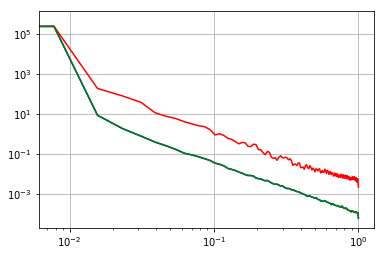

In [12]:
s, f = mlab.psd(r_y)
s2, f2 = mlab.psd(r_y2)
sy, fy = mlab.psd(y)
plt.loglog(f,s,color='b')
plt.loglog(f2,s2,color='r')
plt.loglog(fy,sy,color='g')
plt.grid(True)
plt.show()



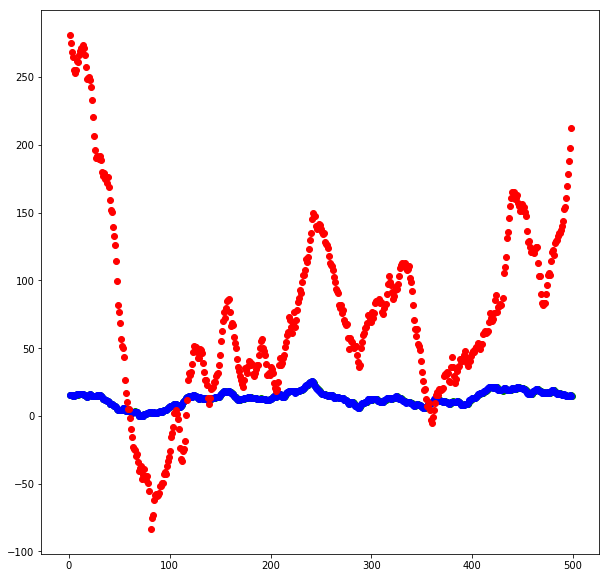

In [6]:
plt.figure(figsize=(10,10))
plt.scatter(x,y,color='g')
#plt.scatter(x,z)
plt.scatter(x_rfft,r_y,color='b')
plt.scatter(x_rfft,r_y2,color='r')
plt.show()

In [203]:
for i in range(20):
    print random.randint(0,5)

2
0
5
3
2
3
3
2
3
0
5
5
2
4
2
5
5
5
2
1
